## Get bands

In [12]:
path = "image"

In [13]:
from os import listdir
from os.path import join
import matplotlib.pyplot as plt

In [14]:
path = "image"

path += "\\" + listdir(path)[0] + "\\GRANULE"
path += "\\" + listdir(path)[0] + "\\IMG_DATA"

In [15]:
print(path)

image\S2A_MSIL1C_20190215T105131_N0207_R051_T31UDQ_20190215T112355.SAFE\GRANULE\L1C_T31UDQ_A019067_20190215T105128\IMG_DATA


In [16]:
import numpy as np
from osgeo import gdal

In [17]:
bands = list()
ind = 0
for i in range(13):
    band_file = listdir(path)[i]
    print(ind, path + "\\" + band_file)
    band = gdal.Open(path + "\\" + band_file, gdal.GA_ReadOnly)
    bands.append(band.GetRasterBand(1).ReadAsArray())
    ind+=1

0 image\S2A_MSIL1C_20190215T105131_N0207_R051_T31UDQ_20190215T112355.SAFE\GRANULE\L1C_T31UDQ_A019067_20190215T105128\IMG_DATA\T31UDQ_20190215T105131_B01.jp2
1 image\S2A_MSIL1C_20190215T105131_N0207_R051_T31UDQ_20190215T112355.SAFE\GRANULE\L1C_T31UDQ_A019067_20190215T105128\IMG_DATA\T31UDQ_20190215T105131_B02.jp2
2 image\S2A_MSIL1C_20190215T105131_N0207_R051_T31UDQ_20190215T112355.SAFE\GRANULE\L1C_T31UDQ_A019067_20190215T105128\IMG_DATA\T31UDQ_20190215T105131_B03.jp2
3 image\S2A_MSIL1C_20190215T105131_N0207_R051_T31UDQ_20190215T112355.SAFE\GRANULE\L1C_T31UDQ_A019067_20190215T105128\IMG_DATA\T31UDQ_20190215T105131_B04.jp2
4 image\S2A_MSIL1C_20190215T105131_N0207_R051_T31UDQ_20190215T112355.SAFE\GRANULE\L1C_T31UDQ_A019067_20190215T105128\IMG_DATA\T31UDQ_20190215T105131_B05.jp2
5 image\S2A_MSIL1C_20190215T105131_N0207_R051_T31UDQ_20190215T112355.SAFE\GRANULE\L1C_T31UDQ_A019067_20190215T105128\IMG_DATA\T31UDQ_20190215T105131_B06.jp2
6 image\S2A_MSIL1C_20190215T105131_N0207_R051_T31UDQ_20190

In [18]:
bands[1].shape

(10980, 10980)

In [19]:
for i in range(13):
    print(i,bands[i].mean(), bands[i].std(), bands[i].min(), bands[i].max())

0 1491.611254441757 92.47340247053698 792 7358
1 1162.4743727957107 143.5133894135958 1 28000
2 977.4611969021337 195.85213427962506 1 28000
3 894.945316604789 282.76031031033415 1 28000
4 1149.7873288078008 300.2594553422167 1 28000
5 1639.4116892777397 565.0042271800222 0 28002
6 1830.6445698255811 652.4732781582819 0 28003
7 1817.4418353124242 662.9955883948433 1 28000
8 875.0057660724417 246.75308537883524 0 5417
9 13.597714174803667 2.0483527292008037 1 226
10 1641.2563840531386 421.07701297527586 0 28001
11 1041.0056912883501 309.6666119789823 1 28000
12 1999.0192370960947 689.9776282781935 0 28004


## Resize bands

In [20]:
import cv2
shape = bands[1].shape

In [21]:
full_image = np.zeros((shape[0], shape[1], 13), dtype=np.float32)

In [22]:
for i in range(13):
    band = bands[i]
    resized = cv2.resize(band[:, :], shape)
    full_image[:, :, i] = resized

In [23]:
full_image.shape

(10980, 10980, 13)

In [16]:
for i in range(13):
    print(i,full_image[:,:,i].mean(), full_image[:,:,i].std(), full_image[:,:,i].min(), full_image[:,:,i].max())

0 1414.4148 88.88429 922.0 18241.0
1 1126.367 136.33084 1.0 27339.0
2 917.8001 181.01524 1.0 25431.0
3 918.9453 280.76566 1.0 28000.0
4 1044.4395 319.15363 331.0 26502.0
5 1213.8176 404.02527 280.0 28000.0
6 1325.9484 460.16327 254.0 28000.0
7 1347.46 499.73743 178.0 28000.0
8 808.95166 270.25546 90.0 14479.0
9 22.2727 4.600687 6.0 657.0
10 2031.495 589.5333 64.0 19697.0
11 1568.2677 396.5214 36.0 19256.0
12 1480.0278 535.44763 0.0 28000.0


In [24]:
full_image

array([[[1466., 1080.,  954., ..., 1813.,  840., 3933.],
        [1466., 1079.,  970., ..., 1802.,  840., 3900.],
        [1466., 1078.,  953., ..., 1778.,  839., 3832.],
        ...,
        [1434., 1117.,  975., ..., 1496.,  720., 3642.],
        [1434., 1123.,  976., ..., 1508.,  744., 3552.],
        [1434., 1134.,  989., ..., 1514.,  755., 3506.]],

       [[1466., 1089.,  946., ..., 1825.,  844., 3942.],
        [1466., 1093.,  947., ..., 1814.,  843., 3917.],
        [1466., 1084.,  936., ..., 1793.,  841., 3866.],
        ...,
        [1434., 1120.,  976., ..., 1492.,  716., 3678.],
        [1434., 1102.,  960., ..., 1504.,  738., 3615.],
        [1434., 1118.,  991., ..., 1510.,  750., 3584.]],

       [[1466., 1095.,  950., ..., 1850.,  850., 3960.],
        [1466., 1108.,  945., ..., 1840.,  849., 3951.],
        [1466., 1096.,  949., ..., 1822.,  846., 3933.],
        ...,
        [1434., 1120.,  970., ..., 1486.,  706., 3749.],
        [1434., 1088.,  967., ..., 1498.,  72

## Show image

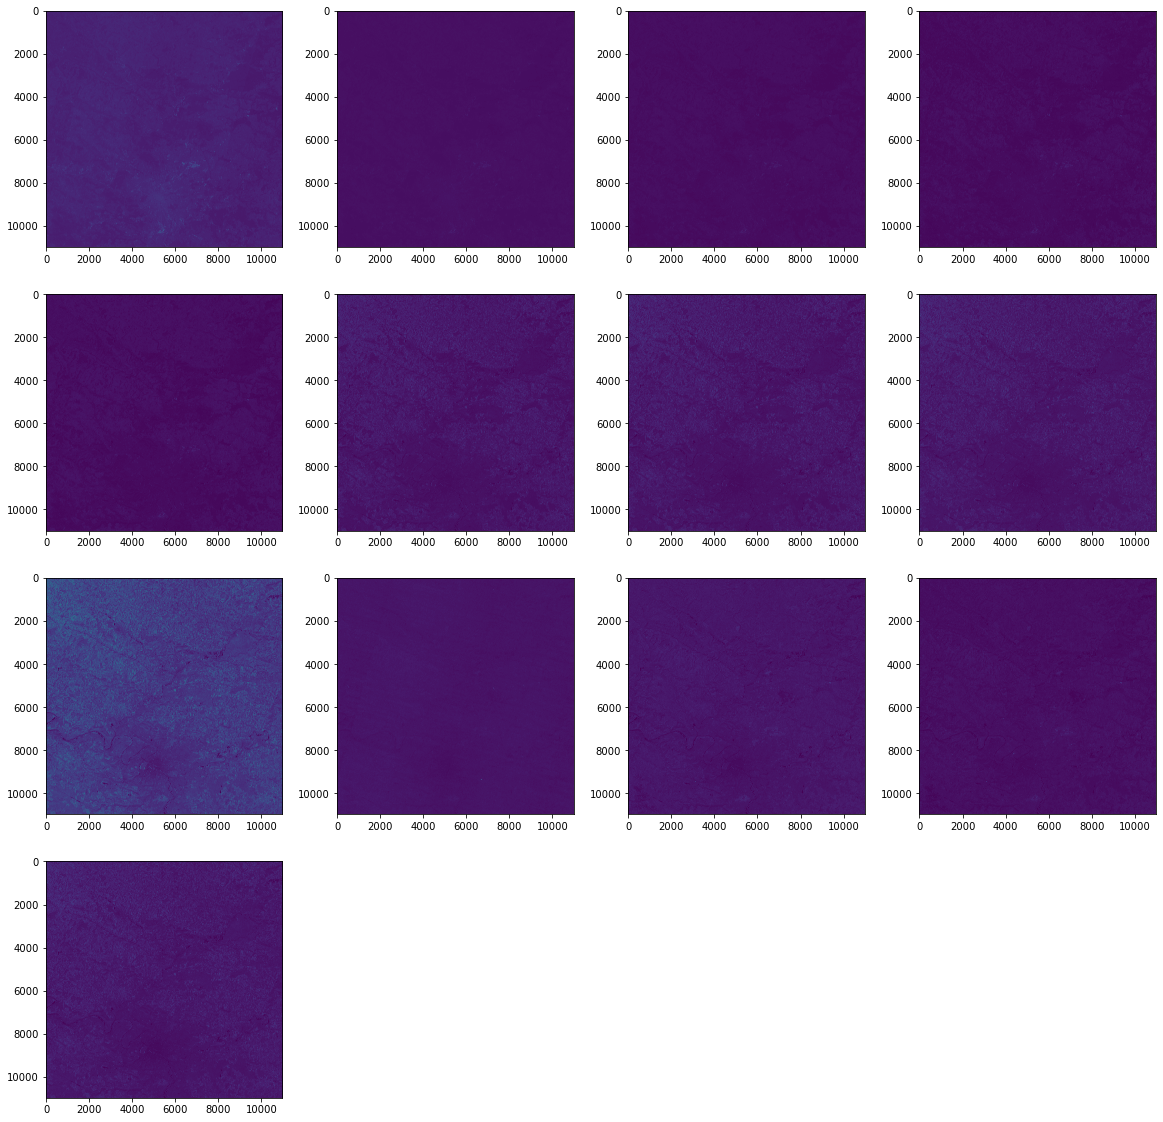

In [25]:
fig = plt.figure(figsize=(20, 20))
for i in range(13):
    fig.add_subplot(4, 4, i + 1)
    plt.imshow(full_image[:, :, i])

In [26]:
import pickle

In [27]:
with open('img.pickle', 'wb') as file:
    pickle.dump(full_image, file, protocol=4)